# Creating the model for the hello world example

Formally the tensorflow model has been created through the notebook _create_sine_model.ipynb_. This notebook has been abandoned  and replaced by a Python file named _train.py_.
Unfortunately this makes the process of creating the model more obscure.
I therefore created this new notebook trying to follow _train.py_ step be step and plotting intermediate results.
The functions have been copy/pasted from train.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'   # disable tensorflow warnings
import tensorflow as tf
print("Tensorflow version: ",tf.__version__)


Tensorflow version:  2.16.1


In [2]:
def get_data():
  """
  The code will generate a set of random `x` values,calculate their sine
  values.
  """
  # Generate a uniformly distributed set of random numbers in the range from
  # 0 to 2π, which covers a complete sine wave oscillation
  x_values = np.random.uniform(low=0, high=2 * math.pi,
                               size=1000).astype(np.float32)

  # Shuffle the values to guarantee they're not in order
  np.random.shuffle(x_values)

  # Calculate the corresponding sine values
  y_values = np.sin(x_values).astype(np.float32)

  return (x_values, y_values)

In [3]:
x_values,y_values = get_data()

Plot the values returned from get_data. The x and y values are shuffled. The first plot shows the sequence of x values. You see the random sequence of the values between 0 and $2\pi$. 1000 values are plotted.

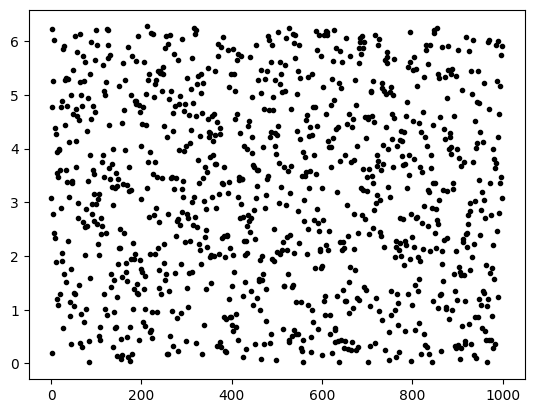

In [4]:
plt.plot(x_values,'k.')

The next plot shows the sine curve

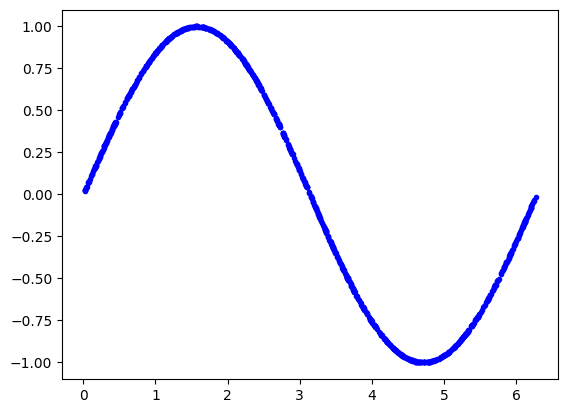

In [5]:
plt.plot(x_values, y_values,'b.')

In [6]:
def create_model() -> tf.keras.Model:
  model = tf.keras.Sequential()

  # First layer takes a scalar input and feeds it through 16 "neurons". The
  # neurons decide whether to activate based on the 'relu' activation function.
  model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1, )))

  # The new second and third layer will help the network learn more complex
  # representations
  model.add(tf.keras.layers.Dense(16, activation='relu'))

  # Final layer is a single neuron, since we want to output a single value
  model.add(tf.keras.layers.Dense(1))

  # Compile the model using the standard 'adam' optimizer and the mean squared
  # error or 'mse' loss function for regression.
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])

  return model


Now we create the model and we train it for 500 epochs using the x_values and y_values returned from get_data()

In [7]:
model = create_model()
epochs=500
model.fit(x_values,
            y_values,
            epochs=epochs,
            validation_split=0.2,
            batch_size=64,
            verbose=2)

Epoch 1/500


/home/uli/.virtualenvs/AI/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1715766069.158456   17054 service.cc:145] XLA service 0x7e994400a250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715766069.158498   17054 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 950M, Compute Capability 5.0
I0000 00:00:1715766070.019719   17054 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/13 - 3s - 261ms/step - loss: 0.4584 - mae: 0.5516 - val_loss: 0.3998 - val_mae: 0.5407
Epoch 2/500
13/13 - 0s - 7ms/step - loss: 0.3855 - mae: 0.5376 - val_loss: 0.3811 - val_mae: 0.5335
Epoch 3/500
13/13 - 0s - 6ms/step - loss: 0.3661 - mae: 0.5250 - val_loss: 0.3648 - val_mae: 0.5175
Epoch 4/500
13/13 - 0s - 6ms/step - loss: 0.3494 - mae: 0.5048 - val_loss: 0.3500 - val_mae: 0.5057
Epoch 5/500
13/13 - 0s - 6ms/step - loss: 0.3325 - mae: 0.4967 - val_loss: 0.3270 - val_mae: 0.4918
Epoch 6/500
13/13 - 0s - 7ms/step - loss: 0.3158 - mae: 0.4840 - val_loss: 0.3118 - val_mae: 0.4786
Epoch 7/500
13/13 - 0s - 6ms/step - loss: 0.3002 - mae: 0.4724 - val_loss: 0.2925 - val_mae: 0.4658
Epoch 8/500
13/13 - 0s - 6ms/step - loss: 0.2838 - mae: 0.4596 - val_loss: 0.2773 - val_mae: 0.4532
Epoch 9/500
13/13 - 0s - 6ms/step - loss: 0.2691 - mae: 0.4477 - val_loss: 0.2599 - val_mae: 0.4405
Epoch 10/500
13/13 - 0s - 7ms/step - loss: 0.2542 - mae: 0.4373 - val_loss: 0.2453 - val_mae: 0.4276
Epoch 11/

In [8]:
model_dir = "/tmp/hello_world_model"
model.save(model_dir, save_format="tf")

ValueError: The `save_format` argument is deprecated in Keras 3. Please remove this argument and pass a file path with either `.keras` or `.h5` extension.Received: save_format=tf

Print the mode summary

Plot the model structure

In [ ]:
print(model.summary())

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

Convert the model to tflite format

In [ ]:
def convert_tflite_model(model):
  """Convert the save TF model to tflite model, then save it as .tflite flatbuffer format
    Args:
        model (tf.keras.Model): the trained hello_world Model
    Returns:
        The converted model in serialized format.
  """
  converter = tf.lite.TFLiteConverter.from_keras_model(model)
  tflite_model = converter.convert()
  return tflite_model


In [ ]:
tflite_model = convert_tflite_model(model)

Finally we save the model converted to tflite

In [ ]:
def save_tflite_model(tflite_model, save_dir, model_name):
  """save the converted tflite model
  Args:
      tflite_model (binary): the converted model in serialized format.
      save_dir (str): the save directory
      model_name (str): model name to be saved
  """
  if not os.path.exists(save_dir):
    os.makedirs(save_dir)
  save_path = os.path.join(save_dir, model_name)
  print("Saving ",model_name," to folder ",save_dir)
  with open(save_path, "wb") as f:
    f.write(tflite_model)


In [ ]:
save_tflite_model(tflite_model,
                    model_dir,
                    model_name="hello_world_float.tflite")


## Quantization to minimize the size of the model
The type of the values in the model is changed from float to int8

In [ ]:
def convert_quantized_tflite_model(source_model_dir, x_values):
  """Convert the save TF model to tflite model, then save it as .tflite
    flatbuffer format

    Args:
        source_model_dir (tf.keras.Model): the trained hello_world flaot Model dir
        x_train (numpy.array): list of the training data

    Returns:
        The converted model in serialized format.
  """

  # Convert the model to the TensorFlow Lite format with quantization
  def representative_dataset(num_samples=500):
    for i in range(num_samples):
      yield [x_values[i].reshape(1, 1)]

  converter = tf.lite.TFLiteConverter.from_saved_model(source_model_dir)
  converter.optimizations = [tf.lite.Optimize.DEFAULT]
  converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
  converter.inference_input_type = tf.int8
  converter.inference_output_type = tf.int8
  converter.representative_dataset = representative_dataset
  tflite_model = converter.convert()
  return tflite_model


In [ ]:
quantized_tflite_model = convert_quantized_tflite_model(model_dir, x_values)

In [ ]:
save_tflite_model(quantized_tflite_model,
                    model_dir,
                    model_name="hello_world_int8.tflite")

In [ ]:
import netron
netron.start(model_dir + '/hello_world_int8.tflite')